# Linear Regression on Time Series Data

In [252]:
pwd

'/Users/kelly/metis_v3/Project_2'

In [253]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [254]:
import pickle

In [255]:
#Import state dataframe

with open('wind.pickle','rb') as read_file:
    wind_data = pickle.load(read_file)
wind_data.head()

mw_year_0  mw_year_1  mw_year_2
State   year                                 
Alabama 1999        0.0        NaN        NaN
        2000        0.0        0.0        NaN
        2001        0.0        0.0        0.0
        2002        0.0        0.0        0.0
        2003        0.0        0.0        0.0

In [256]:
wind_data.groupby(by = 'year').sum()

,mw_year_0,mw_year_1,mw_year_2
year,,,
1999,4944.956,168401.000,162852.000
2000,5078.646,4944.956,168401.000
2001,8463.546,5078.646,4944.956
2002,9374.722,8463.546,5078.646
2003,12699.884,9374.722,8463.546
2004,13446.248,12699.884,9374.722
2005,18294.128,13446.248,12699.884
2006,23149.010,18294.128,13446.248
2007,33814.099,23149.010,18294.128


In [257]:
#Format data to get years and states out of the index

wind_data = wind_data.reset_index()
wind_data.head()

,State,year,mw_year_0,mw_year_1,mw_year_2
0,Alabama,1999,0.0,NaN,NaN
1,Alabama,2000,0.0,0.0,NaN
2,Alabama,2001,0.0,0.0,0.0
3,Alabama,2002,0.0,0.0,0.0
4,Alabama,2003,0.0,0.0,0.0


In [383]:
wind_data.State.unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Grand Total', 'Hawaii', 'Idaho', 'Illinois',
       'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine',
       'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype=object)

In [384]:
#Remove Grand Total

In [387]:
grand_total = wind_data[wind_data['State'] == 'Grand Total']

In [394]:
wind_data = wind_data[wind_data['State'] != 'Grand Total']

In [737]:
state_names = list(wind_data['State'].unique())

In [738]:
#Save state_names as pickle file to use later

with open ('states.pickle', 'wb') as to_write:
    pickle.dump(state_names, to_write)

In [395]:
year_list = []
for year in list(wind_data.groupby(by = 'year').sum().reset_index()['year']):
    year_list+=[[year]]

In [396]:
year_list

[['1999'],
 ['2000'],
 ['2001'],
 ['2002'],
 ['2003'],
 ['2004'],
 ['2005'],
 ['2006'],
 ['2007'],
 ['2008'],
 ['2009'],
 ['2010'],
 ['2011'],
 ['2012'],
 ['2013'],
 ['2014'],
 ['2015'],
 ['2016'],
 ['2017']]

In [397]:
X = np.array(year_list)
y = np.array(wind_data.groupby(by = 'year').sum().reset_index()['mw_year_0'])

In [398]:
y

array([ 2472.478 ,  2539.323 ,  4231.773 ,  4687.361 ,  6349.942 ,
        6723.124 ,  9147.064 , 11574.505 , 16907.0495, 25410.042 ,
       34863.353 , 40266.961 , 46916.1   , 60005.    , 61107.    ,
       65880.    , 74471.    , 82171.    , 84945.    ])

In [399]:
y = np.array(y).reshape(-1,1)

In [400]:
y.shape

(19, 1)

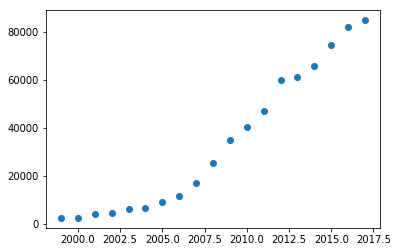

In [401]:
#Plot total for all states to see trend over time

plt.scatter(year_list,y);

In [402]:
wind_data.head()

,State,year,mw_year_0,mw_year_1,mw_year_2
0,Alabama,1999,0.0,NaN,NaN
1,Alabama,2000,0.0,0.0,NaN
2,Alabama,2001,0.0,0.0,0.0
3,Alabama,2002,0.0,0.0,0.0
4,Alabama,2003,0.0,0.0,0.0


In [403]:
#Filter out 1999 & 2000 for all states since these years don't have corresponding year-1 and year-2 values for each state

wind_data[wind_data['year'] != '1999'][wind_data['year'] != '2000']

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


,State,year,mw_year_0,mw_year_1,mw_year_2
2,Alabama,2001,0.000,0.000,0.000
3,Alabama,2002,0.000,0.000,0.000
4,Alabama,2003,0.000,0.000,0.000
5,Alabama,2004,0.000,0.000,0.000
6,Alabama,2005,0.000,0.000,0.000
7,Alabama,2006,0.000,0.000,0.000
8,Alabama,2007,0.000,0.000,0.000
9,Alabama,2008,0.000,0.000,0.000
10,Alabama,2009,0.000,0.000,0.000
11,Alabama,2010,0.000,0.000,0.000


In [1043]:
wind_data_formatted = wind_data[wind_data['year'] != '1999'][wind_data['year'] != '2000']

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [1032]:
wind_data_formatted.head(50)

,State,year,mw_year_0,mw_year_1,mw_year_2
2,Alabama,2001,0.000,0.000,0.000
3,Alabama,2002,0.000,0.000,0.000
4,Alabama,2003,0.000,0.000,0.000
5,Alabama,2004,0.000,0.000,0.000
6,Alabama,2005,0.000,0.000,0.000
7,Alabama,2006,0.000,0.000,0.000
8,Alabama,2007,0.000,0.000,0.000
9,Alabama,2008,0.000,0.000,0.000
10,Alabama,2009,0.000,0.000,0.000
11,Alabama,2010,0.000,0.000,0.000


In [1033]:
wind_data_formatted.head()

,State,year,mw_year_0,mw_year_1,mw_year_2
2,Alabama,2001,0.0,0.0,0.0
3,Alabama,2002,0.0,0.0,0.0
4,Alabama,2003,0.0,0.0,0.0
5,Alabama,2004,0.0,0.0,0.0
6,Alabama,2005,0.0,0.0,0.0


## Linear Regression

In [407]:
from sklearn.linear_model import LinearRegression

In [408]:
lr = LinearRegression()

In [409]:
lr_X = wind_data_formatted[['mw_year_1', 'mw_year_2']]

In [410]:
lr_X

,mw_year_1,mw_year_2
2,0.000,0.000
3,0.000,0.000
4,0.000,0.000
5,0.000,0.000
6,0.000,0.000
7,0.000,0.000
8,0.000,0.000
9,0.000,0.000
10,0.000,0.000
11,0.000,0.000


In [411]:
lr_y = wind_data_formatted['mw_year_0']

In [412]:
lr_y

2          0.000
3          0.000
4          0.000
5          0.000
6          0.000
7          0.000
8          0.000
9          0.000
10         0.000
11         0.000
12         0.000
13         0.000
14         0.000
15         0.000
16         0.000
17         0.000
18         0.000
21         0.825
22         0.925
23         0.925
24         1.189
25         1.489
26         1.705
27         1.705
28         3.718
29         8.518
30         8.716
31        11.000
32        59.000
33        62.000
          ...   
975       53.045
976       53.045
977       53.045
978      448.985
979      449.085
980      468.895
981      631.000
982      648.000
983      648.000
984      648.000
985      648.000
986      648.000
987      648.000
990      140.635
991      140.635
992      284.635
993      284.635
994      288.455
995      288.455
996      288.455
997      676.255
998     1099.255
999     1412.255
1000    1412.000
1001    1410.000
1002    1410.000
1003    1410.000
1004    1410.0

In [413]:
lr.fit(lr_X, lr_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [414]:
lr.score(lr_X, lr_y)

0.9869740143104656

In [415]:
lr.coef_

array([ 1.44663011, -0.38909972])

In [416]:
lr.intercept_

22.133803559902958

In [417]:
lr_X.shape

(884, 2)

In [418]:
lr_y.shape

(884,)

In [419]:
lr_predictions = lr.predict(lr_X)

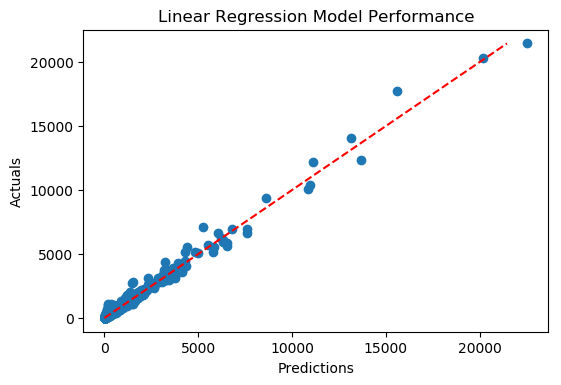

In [420]:
# Plot Predictions vs. Actuals

plt.figure(dpi = 100)
plt.scatter(lr_predictions, lr_y);
plt.title('Linear Regression Model Performance');
plt.xlabel('Predictions');
plt.ylabel('Actuals');
plt.plot([min(lr_y),max(lr_y)], [min(lr_y), max(lr_y)],'r--');

Train / Test Split

In [421]:
from sklearn.cross_validation import train_test_split

In [422]:
lr2 = LinearRegression()

In [423]:
#Setting aside 30% of model to test on, train on remaining 70%

X_train, X_test, y_train, y_test = train_test_split(lr_X, lr_y, test_size = 0.3)

In [424]:
#Fit model using training data

lr2.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [425]:
#Evaluate model using testing data

lr2.score(X_test, y_test)

0.9862887883032804

In [426]:
#Compare to original Linear Regression model

lr.score(lr_X, lr_y)

0.9869740143104656

Cross Validation

In [427]:
from sklearn.cross_validation import cross_val_score

In [428]:
lr3 = LinearRegression()

In [429]:
scores = cross_val_score(lr3, lr_X, lr_y, cv=10, scoring = 'neg_mean_squared_error')

In [430]:
print(-scores)

[ 35928.67075629  13197.14111931  51619.48767512  41219.28914833
  12524.52986575   5476.97356419  13309.3667677   56979.35872905
 218878.2593044   13728.6418483 ]


In [431]:
-scores.mean()

46286.17187784411

In [432]:
from sklearn import feature_selection as f_select

In [433]:
#Run cross validation and count number of significant feature columns

est=LinearRegression()

sig_columns=[]
p_values=[] 

for feature in lr_X.columns:

    p_value=f_select.f_regression(lr_X[[feature]],lr_y) 
    print(p_value)
    if p_value[1][0]<.02: 
        sig_columns.append(feature)
        p_values.append(p_value[1][0])
        
lr_X_trans=lr_X[sig_columns]

cross_val_score(est,lr_X_trans,lr_y,cv=10,scoring='r2').mean() 

(array([59800.36293215]), array([0.]))
(array([21117.99867999]), array([0.]))


0.9744328705418033

In [434]:
print(sig_columns)

['mw_year_1', 'mw_year_2']


K Fold Cross Validation

In [435]:
from sklearn.cross_validation import KFold

In [436]:
kf = KFold(n=len(lr_X), n_folds=3, shuffle=False, random_state=None)

In [437]:
est = LinearRegression()
all_scores = []

for train,test in kf:
    
    x_train=lr_X.iloc[train]
    y_train=lr_y.iloc[train]
    x_test=lr_X.iloc[test]
    y_test=lr_y.iloc[test]
    p_values=[]
    sig_cols=[]
    
    for feature in x_train.columns:
        p_value=f_select.f_regression(x_train[[feature]],y_train)
        if p_value[1][0]<.02: 
            sig_cols.append(feature)
            p_values.append(p_value[1][0])
            
    est.fit(x_train[sig_cols],y_train)
    r_2=est.score(x_test[sig_cols],y_test)
    all_scores.append(r_2)
        
np.mean(all_scores)

0.9826870894780946

## Using Statsmodels

In [438]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

In [439]:
wind_data_formatted.corr()

,mw_year_0,mw_year_1,mw_year_2
mw_year_0,1.000000,0.992706,0.979750
mw_year_1,0.992706,1.000000,0.991914
mw_year_2,0.979750,0.991914,1.000000


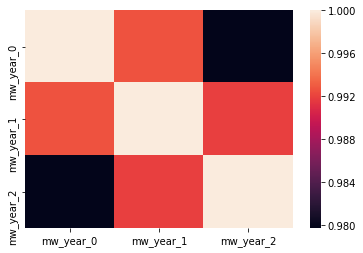

In [440]:
sns.heatmap(wind_data_formatted.corr());

In [441]:
wind_data_formatted.iloc[:,2:].head()

,mw_year_0,mw_year_1,mw_year_2
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0
5,0.0,0.0,0.0
6,0.0,0.0,0.0


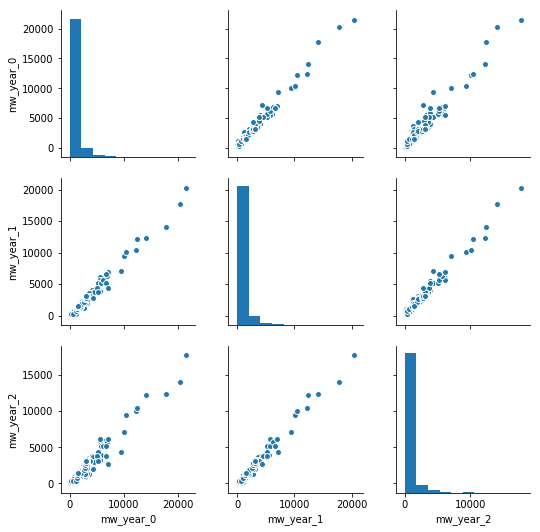

In [442]:
sns.pairplot(wind_data_formatted.iloc[:,2:]);

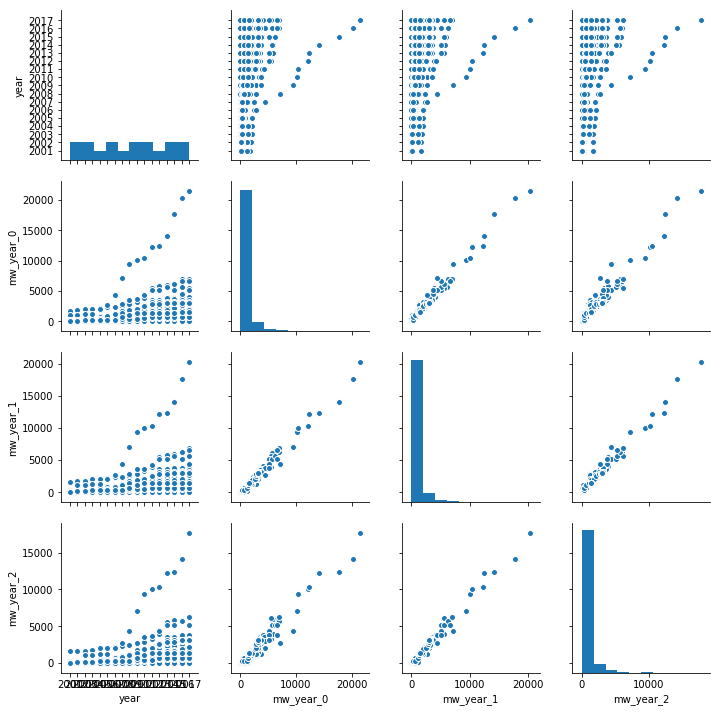

In [443]:
sns.pairplot(wind_data_formatted);

In [444]:
lm1 = smf.ols('mw_year_0 ~ mw_year_1 + mw_year_2', data = wind_data_formatted)

In [445]:
fit_lm1 = lm1.fit()

In [446]:
fit_lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              mw_year_0   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                 3.338e+04
Date:                Mon, 16 Jul 2018   Prob (F-statistic):               0.00
Time:                        18:47:24   Log-Likelihood:                -5978.5
No. Observations:                 884   AIC:                         1.196e+04
Df Residuals:                     881   BIC:                         1.198e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.1338      7.556      2.929      0.003       7.304      36.964
mw_year_1      1.4466      0.034     42.784      0.000       1.380       1.513
mw_year_2     -0.3891      0.039    -10.102      0.000      -0.465      -0.314
==============================================================================
Omnibus:                      651.959   Durbin-Watson:                   1.934
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            31128.514
Skew:                           2.818   Prob(JB):                         0.00
Kurtosis:                      31.519   Cond. No.                     2.50e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [447]:
fit_lm1.rsquared_adj

0.9869444434008411

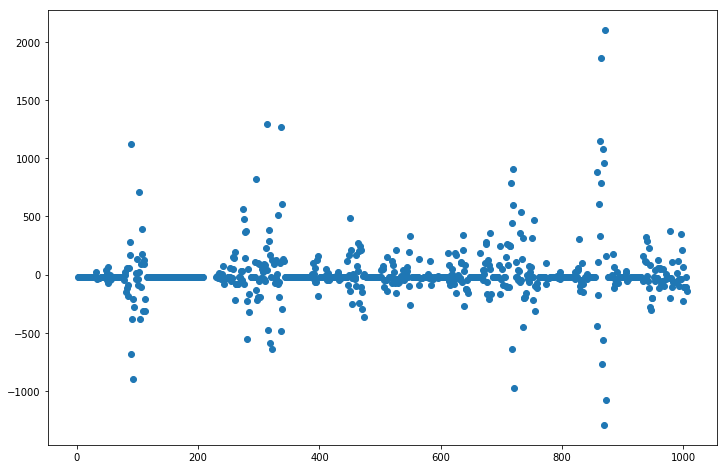

In [448]:
fit_lm1.resid.plot(style = 'o', figsize = (12,8));

In [449]:
lm2 = smf.ols('mw_year_0 ~ mw_year_1', data = wind_data_formatted)

In [450]:
fit_lm2 = lm2.fit()

In [451]:
fit_lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              mw_year_0   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                 5.980e+04
Date:                Mon, 16 Jul 2018   Prob (F-statistic):               0.00
Time:                        18:47:35   Log-Likelihood:                -6026.9
No. Observations:                 884   AIC:                         1.206e+04
Df Residuals:                     882   BIC:                         1.207e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     25.7280      7.968      3.229      0.001      10.089      41.367
mw_year_1      1.1078      0.005    244.541      0.000       1.099       1.117
==============================================================================
Omnibus:                      723.464   Durbin-Watson:                   1.411
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            37698.033
Skew:                           3.299   Prob(JB):                         0.00
Kurtosis:                      34.304   Cond. No.                     1.88e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.88e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [452]:
fit_lm2.rsquared_adj

0.9854488197668343

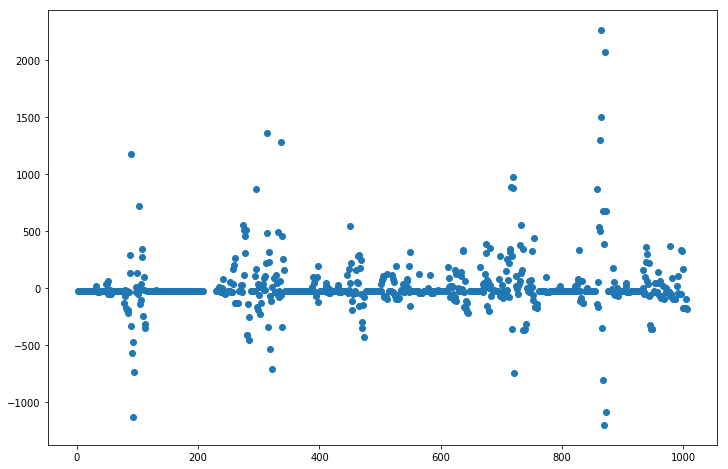

In [453]:
fit_lm2.resid.plot(style = 'o', figsize = (12,8));

In [454]:
wind_data_formatted[wind_data_formatted['year'] == '2012']

,State,year,mw_year_0,mw_year_1,mw_year_2
13,Alabama,2012,0.0,0.0,0.000
32,Alaska,2012,59.0,11.0,8.716
51,Arizona,2012,238.0,139.0,128.100
70,Arkansas,2012,0.0,0.1,0.100
89,California,2012,5542.0,3917.0,3252.607
108,Colorado,2012,2301.0,1805.0,1298.550
127,Connecticut,2012,0.0,0.0,0.000
146,Delaware,2012,2.0,2.0,2.000
165,District of Columbia,2012,0.0,0.0,0.000
184,Florida,2012,0.0,0.0,0.000


In [455]:
wind_data_formatted[wind_data_formatted['State'] == 'Texas']

,State,year,mw_year_0,mw_year_1,mw_year_2
857,Texas,2001,1095.76,183.52,183.52
858,Texas,2002,1095.76,1095.76,183.52
859,Texas,2003,1290.26,1095.76,1095.76
860,Texas,2004,1290.26,1290.26,1095.76
861,Texas,2005,1992.07,1290.26,1290.26
862,Texas,2006,2735.77,1992.07,1290.26
863,Texas,2007,4353.37,2735.77,1992.07
864,Texas,2008,7112.67,4353.37,2735.77
865,Texas,2009,9403.37,7112.67,4353.37
866,Texas,2010,10089.43,9403.37,7112.67


In [456]:
texas = wind_data_formatted[wind_data_formatted['State'] == 'Texas']

In [457]:
texas_x = texas.year
texas_y = texas.mw_year_0

Text(0,0.5,'Megawatts (MW)')

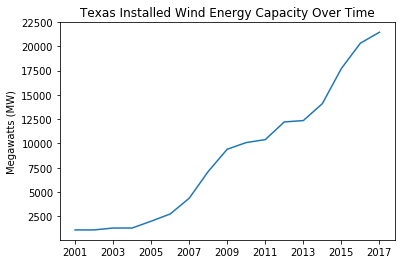

In [514]:
plt.plot(texas_x, texas_y);
plt.xticks(np.arange(17, step = 2));
plt.title('Texas Installed Wind Energy Capacity Over Time')
plt.ylabel('Megawatts (MW)')

In [459]:
wind_data_formatted.groupby(by = 'State').sum()

,mw_year_0,mw_year_1,mw_year_2
State,,,
Alabama,0.0000,0.0000,0.0000
Alaska,409.7150,348.5400,287.2650
Arizona,1848.1000,1580.1000,1312.1000
Arkansas,0.9000,0.9000,0.9000
California,61714.9820,57769.9750,53723.9680
Colorado,23853.0000,20845.6000,17841.2000
Connecticut,15.0000,10.0000,5.0000
Delaware,16.0000,14.0000,12.0000
District of Columbia,0.0000,0.0000,0.0000


In [460]:
total_by_state = wind_data_formatted.groupby(by = 'State').sum()

In [461]:
total_by_state['year1_change'] = total_by_state['mw_year_0'] - total_by_state['mw_year_1']
total_by_state['year2_change'] = total_by_state['mw_year_1'] - total_by_state['mw_year_2']

In [466]:
#Top states with largest aggregate year over year change in total installed wind power capacity

total_by_state.sort_values(by = 'year1_change', ascending = False).head()

,mw_year_0,mw_year_1,mw_year_2,year1_change,year2_change
State,,,,,
Texas,149003.720,127737.240,107599.760,21266.48,20137.48
Iowa,55388.126,48656.546,41981.966,6731.58,6674.58
Oklahoma,35802.500,29157.500,22512.500,6645.00,6645.00
Kansas,27710.900,22602.400,18152.900,5108.50,4449.50
Illinois,30862.250,26836.250,22810.250,4026.00,4026.00


In [467]:
#Top states with largest aggregate change in total installed wind power capacity, one year prior compared to the previous year

total_by_state.sort_values(by = 'year2_change', ascending = False).head()

,mw_year_0,mw_year_1,mw_year_2,year1_change,year2_change
State,,,,,
Texas,149003.720,127737.240,107599.760,21266.480,20137.480
Iowa,55388.126,48656.546,41981.966,6731.580,6674.580
Oklahoma,35802.500,29157.500,22512.500,6645.000,6645.000
Kansas,27710.900,22602.400,18152.900,5108.500,4449.500
California,61714.982,57769.975,53723.968,3945.007,4046.007


In [470]:
#Filter out Texas

wind_data_less_texas = wind_data_formatted[wind_data_formatted['State'] != 'Texas']

In [471]:
wind_data_less_texas.corr()

,mw_year_0,mw_year_1,mw_year_2
mw_year_0,1.000000,0.989235,0.970777
mw_year_1,0.989235,1.000000,0.988231
mw_year_2,0.970777,0.988231,1.000000


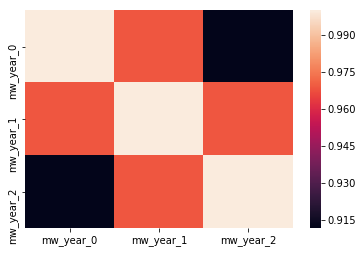

In [728]:
sns.heatmap(wind_data_less_texas.corr());

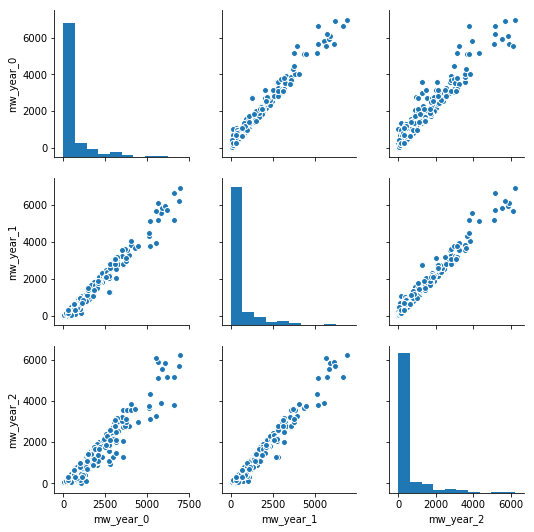

In [477]:
sns.pairplot(wind_data_less_texas.iloc[:,2:]);

In [476]:
lm_no_texas = smf.ols('mw_year_0 ~ mw_year_1 + mw_year_2', data = wind_data_less_texas)

In [478]:
fit_lm_no_texas = lm_no_texas.fit()

In [479]:
fit_lm_no_texas.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              mw_year_0   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                 2.180e+04
Date:                Mon, 16 Jul 2018   Prob (F-statistic):               0.00
Time:                        19:00:37   Log-Likelihood:                -5608.6
No. Observations:                 867   AIC:                         1.122e+04
Df Residuals:                     864   BIC:                         1.124e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     26.8133      5.909      4.538      0.000      15.216      38.410
mw_year_1      1.3925      0.034     41.194      0.000       1.326       1.459
mw_year_2     -0.3528      0.038     -9.395      0.000      -0.427      -0.279
==============================================================================
Omnibus:                      627.490   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18775.016
Skew:                           2.905   Prob(JB):                         0.00
Kurtosis:                      25.045   Cond. No.                     1.69e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.69e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [491]:
print('Adj R-Squared with Texas removed:''\t', fit_lm_no_texas.rsquared_adj)
print('Original R-Squared:''\t\t\t', fit_lm1.rsquared_adj)

Adj R-Squared with Texas removed:	 0.980525098352082
Original R-Squared:			 0.9869444434008411


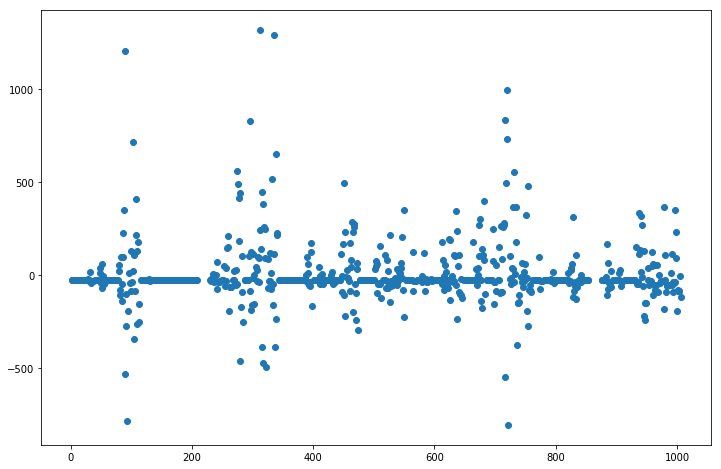

In [492]:
fit_lm_no_texas.resid.plot(style = 'o', figsize = (12,8));

In [494]:
#Linear Regression with Texas removed as outlier

lr_no_texas = LinearRegression()

In [496]:
lr_no_texas_X = wind_data_less_texas[['mw_year_1', 'mw_year_2']]

In [497]:
lr_no_texas_y = wind_data_less_texas['mw_year_0']

In [499]:
X_train_no_texas, X_test_no_texas, y_train_no_texas, y_test_no_texas = train_test_split(lr_no_texas_X, lr_no_texas_y, test_size = 0.3)

In [500]:
lr_no_texas.fit(X_train_no_texas, y_train_no_texas)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [502]:
lr_no_texas.score(X_test_no_texas, y_test_no_texas)

0.9830501414216387

In [506]:
lr_predictions_no_texas = lr_no_texas.predict(lr_no_texas_X)

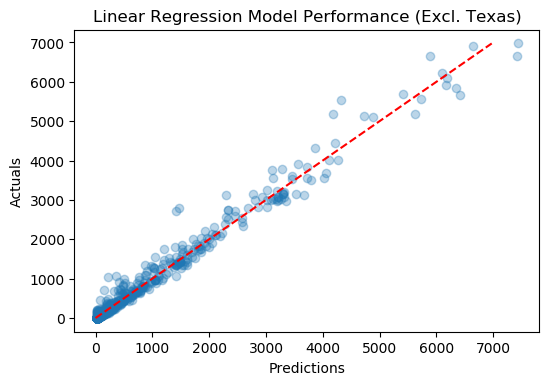

In [516]:
# Plot Predictions vs. Actuals for Dataset excluding Texas

plt.figure(dpi = 100)
plt.scatter(lr_predictions_no_texas, lr_no_texas_y, alpha = 0.3);
plt.title('Linear Regression Model Performance (Excl. Texas)');
plt.xlabel('Predictions');
plt.ylabel('Actuals');
plt.plot([min(lr_no_texas_y),max(lr_no_texas_y)], [min(lr_no_texas_y), max(lr_no_texas_y)],'r--');

In [512]:
#Including Texas

lr2_predictions = lr2.predict(lr_X)

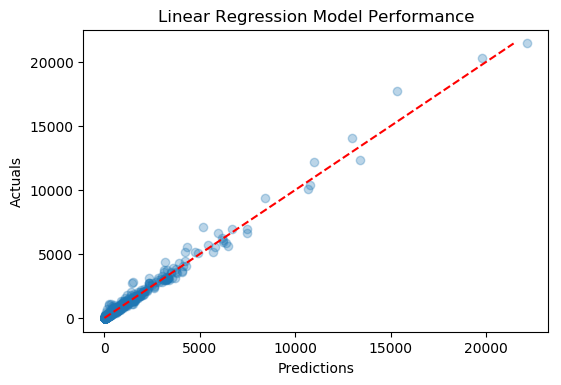

In [1026]:
# Plot Predictions vs. Actuals for Dataset including Texas, after train / test split

plt.figure(dpi = 100)
plt.scatter(lr2_predictions, lr_y, alpha = 0.3);
plt.title('Linear Regression Model Performance');
plt.xlabel('Predictions');
plt.ylabel('Actuals');
plt.plot([min(lr_y),max(lr_y)], [min(lr_y), max(lr_y)],'r--');

In [518]:
total_by_state.sort_values(by = 'mw_year_0', ascending = False).head()

,mw_year_0,mw_year_1,mw_year_2,year1_change,year2_change
State,,,,,
Texas,149003.7200,127737.2400,107599.7600,21266.480,20137.480
California,61714.9820,57769.9750,53723.9680,3945.007,4046.007
Iowa,55388.1260,48656.5460,41981.9660,6731.580,6674.580
Oklahoma,35802.5000,29157.5000,22512.5000,6645.000,6645.000
Minnesota,32512.1495,29304.3595,26051.7495,3207.790,3252.610


In [575]:
state_list = ['Texas', 'California', 'Iowa', 'Oklahoma', 'Minnesota']

In [579]:
top_five = wind_data_formatted[wind_data_formatted['State'].isin(state_list)]

In [580]:
top_five.head()

,State,year,mw_year_0,mw_year_1,mw_year_2
78,California,2001,1683.093,1615.993,1615.993
79,California,2002,1823.067,1683.093,1615.993
80,California,2003,2024.907,1823.067,1683.093
81,California,2004,2094.977,2024.907,1823.067
82,California,2005,2149.457,2094.977,2024.907


In [581]:
top_five_year = top_five['year']
top_five_y = top_five['mw_year_0']

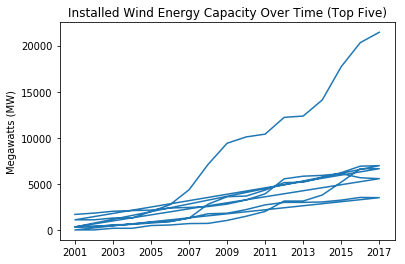

In [582]:
plt.plot(top_five_year, top_five_y);
plt.xticks(np.arange(17, step = 2));
plt.title('Installed Wind Energy Capacity Over Time (Top Five)');
plt.ylabel('Megawatts (MW)');

In [547]:
california_data = wind_data_formatted[wind_data_formatted['State'] == 'California']

In [548]:
california_data

,State,year,mw_year_0,mw_year_1,mw_year_2
78,California,2001,1683.093,1615.993,1615.993
79,California,2002,1823.067,1683.093,1615.993
80,California,2003,2024.907,1823.067,1683.093
81,California,2004,2094.977,2024.907,1823.067
82,California,2005,2149.457,2094.977,2024.907
83,California,2006,2376.107,2149.457,2094.977
84,California,2007,2439.107,2376.107,2149.457
85,California,2008,2536.707,2439.107,2376.107
86,California,2009,2797.953,2536.707,2439.107
87,California,2010,3252.607,2797.953,2536.707


In [549]:
ca_X = california_data[['mw_year_1', 'mw_year_2']]

In [550]:
ca_predictions = lr_no_texas.predict(ca_X)

In [552]:
ca_predictions

array([1703.85814708, 1797.06440728, 1967.75784691, 2198.60483515,
       2224.52694396, 2275.41289552, 2570.96980503, 2578.29360838,
       2691.57736175, 3019.93478882, 3559.05160914, 4321.0830416 ,
       6343.25572889, 6168.39205132, 6187.34818469, 6421.87956393,
       5734.78202942])

In [553]:
ca_y = california_data['mw_year_0']

In [556]:
ca_year = california_data['year']

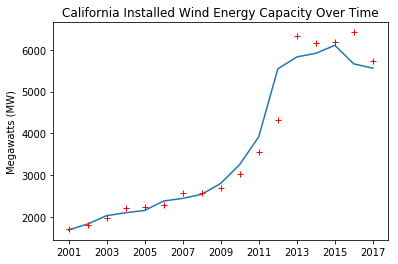

In [586]:
plt.plot(ca_year, ca_y);
plt.plot(ca_year, ca_predictions, 'r+')
plt.xticks(np.arange(17, step = 2));
plt.title('California Installed Wind Energy Capacity Over Time');
plt.ylabel('Megawatts (MW)');

In [596]:
ca_X.iloc[[-1]]

,mw_year_1,mw_year_2
94,5662.0,6108.0


In [638]:
float(lr_no_texas.predict(ca_X.iloc[[-1]]))


5734.7820294158955

In [598]:
california_data.tail()

,State,year,mw_year_0,mw_year_1,mw_year_2
90,California,2013,5830.0,5542.0,3917.0
91,California,2014,5917.0,5830.0,5542.0
92,California,2015,6108.0,5917.0,5830.0
93,California,2016,5662.0,6108.0,5917.0
94,California,2017,5561.0,5662.0,6108.0


In [610]:
california_data.iloc[[-1]]

,State,year,mw_year_0,mw_year_1,mw_year_2
94,California,2017,5561.0,5662.0,6108.0


In [694]:
next_year = {'State':'California', 'year': '2018', 'mw_year_0':float(lr_no_texas.predict(ca_X.iloc[[-1]])), 'mw_year_1':california_data.iloc[-1]['mw_year_0'], 'mw_year_2' : california_data.iloc[-1]['mw_year_1']}

In [695]:
next_year

{'State': 'California',
 'year': '2018',
 'mw_year_0': 5986.036526585615,
 'mw_year_1': 5561.0,
 'mw_year_2': 5662.0}

In [696]:
california_data_predicted = california_data.append(next_year, ignore_index=True)

In [697]:
ca_X = california_data_predicted[['mw_year_1', 'mw_year_2']]

In [698]:
ca_X

,mw_year_1,mw_year_2
0,1615.993,1615.993
1,1683.093,1615.993
2,1823.067,1683.093
3,2024.907,1823.067
4,2094.977,2024.907
5,2149.457,2094.977
6,2376.107,2149.457
7,2439.107,2376.107
8,2536.707,2439.107
9,2797.953,2536.707


In [699]:
california_data_predicted

,State,year,mw_year_0,mw_year_1,mw_year_2
0,California,2001,1683.093000,1615.993,1615.993
1,California,2002,1823.067000,1683.093,1615.993
2,California,2003,2024.907000,1823.067,1683.093
3,California,2004,2094.977000,2024.907,1823.067
4,California,2005,2149.457000,2094.977,2024.907
5,California,2006,2376.107000,2149.457,2094.977
6,California,2007,2439.107000,2376.107,2149.457
7,California,2008,2536.707000,2439.107,2376.107
8,California,2009,2797.953000,2536.707,2439.107
9,California,2010,3252.607000,2797.953,2536.707


In [700]:
float(lr_no_texas.predict(ca_X.iloc[[-1]]))

5752.278354883642

In [701]:
california_data_predicted.iloc[[-1]]

,State,year,mw_year_0,mw_year_1,mw_year_2
17,California,2018,5986.036527,5561.0,5662.0


In [702]:
#Add 2019
ca_X = california_data_predicted[['mw_year_1', 'mw_year_2']]  
next_year = {'State':'California', 'year': '2019', 'mw_year_0':float(lr_no_texas.predict(ca_X.iloc[[-1]])), 'mw_year_1':california_data_predicted.iloc[-1]['mw_year_0'], 'mw_year_2' : california_data_predicted.iloc[-1]['mw_year_1']}
california_data_predicted = california_data_predicted.append(next_year, ignore_index=True)
ca_X = california_data_predicted[['mw_year_1', 'mw_year_2']]  

In [703]:
california_data_predicted.tail()

,State,year,mw_year_0,mw_year_1,mw_year_2
14,California,2015,6108.000000,5917.000000,5830.0
15,California,2016,5662.000000,6108.000000,5917.0
16,California,2017,5561.000000,5662.000000,6108.0
17,California,2018,5986.036527,5561.000000,5662.0
18,California,2019,5752.278355,5986.036527,5561.0


In [704]:
#Add 2020
    
next_year = {'State':'California', 'year': '2020', 'mw_year_0':float(lr_no_texas.predict(ca_X.iloc[[-1]])), 'mw_year_1':california_data_predicted.iloc[-1]['mw_year_0'], 'mw_year_2' : california_data_predicted.iloc[-1]['mw_year_1']}
california_data_predicted = california_data_predicted.append(next_year, ignore_index=True)
ca_X = california_data_predicted[['mw_year_1', 'mw_year_2']]

In [705]:
california_data_predicted.tail()

,State,year,mw_year_0,mw_year_1,mw_year_2
15,California,2016,5662.000000,6108.000000,5917.000000
16,California,2017,5561.000000,5662.000000,6108.000000
17,California,2018,5986.036527,5561.000000,5662.000000
18,California,2019,5752.278355,5986.036527,5561.000000
19,California,2020,6378.414850,5752.278355,5986.036527


In [706]:
california_data_predicted

,State,year,mw_year_0,mw_year_1,mw_year_2
0,California,2001,1683.093000,1615.993000,1615.993000
1,California,2002,1823.067000,1683.093000,1615.993000
2,California,2003,2024.907000,1823.067000,1683.093000
3,California,2004,2094.977000,2024.907000,1823.067000
4,California,2005,2149.457000,2094.977000,2024.907000
5,California,2006,2376.107000,2149.457000,2094.977000
6,California,2007,2439.107000,2376.107000,2149.457000
7,California,2008,2536.707000,2439.107000,2376.107000
8,California,2009,2797.953000,2536.707000,2439.107000
9,California,2010,3252.607000,2797.953000,2536.707000


In [709]:
ca_year_predictions = california_data_predicted['year']

In [716]:
ca_year_predictions.iloc[-3:]

17    2018
18    2019
19    2020
Name: year, dtype: object

In [720]:
california_data_predicted.iloc[-3:]['mw_year_0']

17    5986.036527
18    5752.278355
19    6378.414850
Name: mw_year_0, dtype: float64

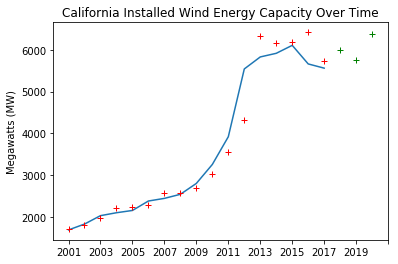

In [792]:
plt.plot(ca_year, ca_y);
plt.plot(ca_year, ca_predictions, 'r+')
plt.plot(ca_year_predictions.iloc[-3:],california_data_predicted.iloc[-3:]['mw_year_0'],'g+')
plt.xticks(np.arange(21, step = 2));
plt.title('California Installed Wind Energy Capacity Over Time');
plt.ylabel('Megawatts (MW)');

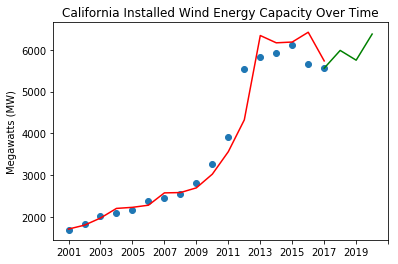

In [796]:
plt.scatter(ca_year, ca_y);
plt.plot(ca_year, ca_predictions, 'r')
plt.plot(ca_year_predictions.iloc[-4:],california_data_predicted.iloc[-4:]['mw_year_0'],'g')
plt.xticks(np.arange(21, step = 2));
plt.title('California Installed Wind Energy Capacity Over Time');
plt.ylabel('Megawatts (MW)');

In [743]:
wind_data_formatted.groupby(by = ['State', 'year']).sum()

mw_year_0  mw_year_1  mw_year_2
State     year                                 
Alabama   2001      0.000      0.000      0.000
          2002      0.000      0.000      0.000
          2003      0.000      0.000      0.000
          2004      0.000      0.000      0.000
          2005      0.000      0.000      0.000
          2006      0.000      0.000      0.000
          2007      0.000      0.000      0.000
          2008      0.000      0.000      0.000
          2009      0.000      0.000      0.000
          2010      0.000      0.000      0.000
          2011      0.000      0.000      0.000
          2012      0.000      0.000      0.000
          2013      0.000      0.000      0.000
          2014      0.000      0.000      0.000
          2015      0.000      0.000      0.000
          2016      0.000      0.000      0.000
          2017      0.000      0.000      0.000
Alaska    2001      0.825      0.825      0.725
          2002      0.925      0.825      0.825
          2003      0.925      0.925      0.825
          2004      1.189      0.925      0.925
          2005      1.489      1.189      0.925
          2006      1.705      1.489      1.189
          2007      1.705      1.705      1.489
          2008      3.718      1.705      1.705
          2009      8.518      3.718      1.705
          2010      8.716      8.518      3.718
          2011     11.000      8.716      8.518
          2012     59.000     11.000      8.716
          2013     62.000     59.000     11.000
...                   ...        ...        ...
Wisconsin 2005     53.045     53.045     52.980
          2006     53.045     53.045     53.045
          2007     53.045     53.045     53.045
          2008    448.985     53.045     53.045
          2009    449.085    448.985     53.045
          2010    468.895    449.085    448.985
          2011    631.000    468.895    449.085
          2012    648.000    631.000    468.895
          2013    648.000    648.000    631.000
          2014    648.000    648.000    648.000
          2015    648.000    648.000    648.000
          2016    648.000    648.000    648.000
          2017    648.000    648.000    648.000
Wyoming   2001    140.635     90.635     72.515
          2002    140.635    140.635     90.635
          2003    284.635    140.635    140.635
          2004    284.635    284.635    140.635
          2005    288.455    284.635    284.635
          2006    288.455    288.455    284.635
          2007    288.455    288.455    288.455
          2008    676.255    288.455    288.455
          2009   1099.255    676.255    288.455
          2010   1412.255   1099.255    676.255
          2011   1412.000   1412.255   1099.255
          2012   1410.000   1412.000   1412.255
          2013   1410.000   1410.000   1412.000
          2014   1410.000   1410.000   1410.000
          2015   1410.000   1410.000   1410.000
          2016   1490.000   1410.000   1410.000
          2017   1489.000   1490.000   1410.000

[884 rows x 3 columns]

In [767]:
#state_names

In [786]:
wind_predicted = wind_data_formatted

In [789]:
wind_predicted.tail()

,State,year,mw_year_0,mw_year_1,mw_year_2
1002,Wyoming,2013,1410.0,1410.0,1412.0
1003,Wyoming,2014,1410.0,1410.0,1410.0
1004,Wyoming,2015,1410.0,1410.0,1410.0
1005,Wyoming,2016,1490.0,1410.0,1410.0
1006,Wyoming,2017,1489.0,1490.0,1410.0


In [790]:
def create_year(year, state):
        
    #lr_X = wind_predicted[['mw_year_1', 'mw_year_2']]
    next_year = {'State':state, 'year': year, 'mw_year_0':float(lr_no_texas.predict(lr_X.iloc[[-1]])), 'mw_year_1':wind_predicted.iloc[-1]['mw_year_0'], 'mw_year_2' : wind_predicted.iloc[-1]['mw_year_1']}
    wind_predicted = wind_predicted.append(next_year, ignore_index=True)
    lr_X = wind_predicted[['mw_year_1', 'mw_year_2']]

In [849]:
wind_data_less_texas = wind_data_formatted[wind_data_formatted['State'] != 'Texas']

In [ ]:
lr_no_texas_X

In [850]:
lr_no_texas.predict(lr_no_texas_X)

array([  30.86663603,   30.86663603,   30.86663603,   30.86663603,
         30.86663603,   30.86663603,   30.86663603,   30.86663603,
         30.86663603,   30.86663603,   30.86663603,   30.86663603,
         30.86663603,   30.86663603,   30.86663603,   30.86663603,
         30.86663603,   31.75611437,   31.72073502,   31.85964152,
         31.82426217,   32.19097533,   32.51429334,   32.70819334,
         32.63177395,   35.42796175,   41.3832874 ,   39.9601136 ,
         43.06268691,  108.92974169,   96.11484998,   95.05346956,
         95.05346956,   95.05346956,   30.86663603,   30.86663603,
         30.86663603,   30.86663603,   30.86663603,   30.86663603,
         30.86663603,   30.86663603,   30.86663603,  118.37772981,
        186.51687131,  178.62572457,  312.28680881,  277.26125508,
        277.26125508,  318.9332045 ,  308.31940034,   30.86663603,
         30.86663603,   30.86663603,   31.00554252,   30.97016318,
         30.97016318,   30.97016318,   30.97016318,   30.97016

In [851]:
#Use last year and 2 years ago to predict current year

wind_data_less_texas['mw_0_pred'] = lr_no_texas.predict(wind_data_less_texas[['mw_year_1', 'mw_year_2']])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [852]:
wind_data_less_texas.head()

,State,year,mw_year_0,mw_year_1,mw_year_2,mw_0_pred,mw_+1_pred,mw_+2_pred,mw_+3_pred
2,Alabama,2001,0.0,0.0,0.0,30.866636,30.866636,73.742399,122.379206
3,Alabama,2002,0.0,0.0,0.0,30.866636,30.866636,73.742399,122.379206
4,Alabama,2003,0.0,0.0,0.0,30.866636,30.866636,73.742399,122.379206
5,Alabama,2004,0.0,0.0,0.0,30.866636,30.866636,73.742399,122.379206
6,Alabama,2005,0.0,0.0,0.0,30.866636,30.866636,73.742399,122.379206


In [853]:
#Current year and last year to predict next year

wind_data_less_texas['mw_+1_pred'] = lr_no_texas.predict(wind_data_less_texas[['mw_year_0', 'mw_year_1']]) 

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [854]:
#Predict two years out using one year ago actuals and one year of predictions

wind_data_less_texas['mw_+2_pred'] = lr_no_texas.predict(wind_data_less_texas[['mw_+1_pred', 'mw_year_0']]) 

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [855]:
#Predict three years out using two years of predictions

wind_data_less_texas['mw_+3_pred'] = lr_no_texas.predict(wind_data_less_texas[['mw_+2_pred', 'mw_+1_pred']]) 

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [860]:
wind_data_less_texas.head()

,State,year,mw_year_0,mw_year_1,mw_year_2,mw_0_pred,mw_+1_pred,mw_+2_pred,mw_+3_pred
2,Alabama,2001,0.0,0.0,0.0,30.866636,30.866636,73.742399,122.379206
3,Alabama,2002,0.0,0.0,0.0,30.866636,30.866636,73.742399,122.379206
4,Alabama,2003,0.0,0.0,0.0,30.866636,30.866636,73.742399,122.379206
5,Alabama,2004,0.0,0.0,0.0,30.866636,30.866636,73.742399,122.379206
6,Alabama,2005,0.0,0.0,0.0,30.866636,30.866636,73.742399,122.379206


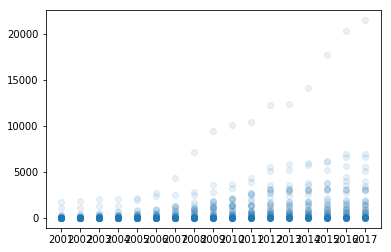

In [902]:
#Including Texas

plt.scatter(wind_data_formatted.year, wind_data_formatted['mw_year_0'], alpha = 0.1);

In [892]:
predictions = wind_data_less_texas.groupby(by = 'year')['mw_0_pred'].sum()

In [893]:
np.arange(2001,2018).shape

(17,)

In [894]:
predictions.shape

(17,)

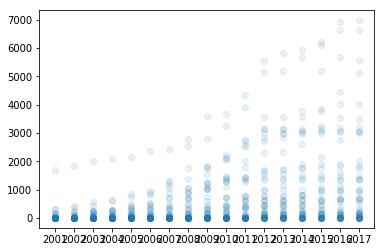

In [897]:
plt.scatter(wind_data_less_texas.year, wind_data_less_texas['mw_year_0'],alpha=0.1);

In [901]:
actuals = wind_data_less_texas.groupby(by = 'year')['mw_year_0'].sum()

In [995]:
future = wind_data_less_texas[wind_data_less_texas['year'] == '2017'].groupby(by = 'year').sum()

In [996]:
future.drop(columns = ['mw_year_1', 'mw_year_2', 'mw_year_0'], inplace = True)

In [997]:
future.loc['2017']

mw_0_pred     67407.257606
mw_+1_pred    67890.753140
mw_+2_pred    73414.749628
mw_+3_pred    79532.750938
Name: 2017, dtype: float64

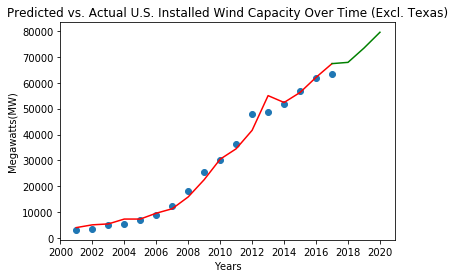

In [1072]:
#Excluding Texas

plt.scatter(np.arange(2001,2018), actuals);
plt.plot(np.arange(2001,2018), predictions, 'r');
plt.plot([2017,2018,2019,2020],future.loc['2017'],'g')

plt.title('Predicted vs. Actual U.S. Installed Wind Capacity Over Time (Excl. Texas)');
plt.ylabel('Megawatts(MW)');
plt.xlabel('Years');
plt.xticks(np.arange(2000,2021, step = 2));

In [1008]:
#MSE, excluding Texas

np.mean((predictions - actuals)**2)

7114320.886064597

In [1011]:
wind_data_formatted.head()

,State,year,mw_year_0,mw_year_1,mw_year_2,mw_0_pred,mw_+1_pred,mw_+2_pred,mw_+3_pred
2,Alabama,2001,0.0,0.0,0.0,30.866636,30.866636,73.742399,122.379206
3,Alabama,2002,0.0,0.0,0.0,30.866636,30.866636,73.742399,122.379206
4,Alabama,2003,0.0,0.0,0.0,30.866636,30.866636,73.742399,122.379206
5,Alabama,2004,0.0,0.0,0.0,30.866636,30.866636,73.742399,122.379206
6,Alabama,2005,0.0,0.0,0.0,30.866636,30.866636,73.742399,122.379206


In [1013]:
X_incl_tx = wind_data_formatted[['mw_year_1', 'mw_year_2']]

In [1018]:
y_incl_tx = wind_data_formatted['mw_year_0']

In [1021]:
predictions_incl_tx = lr2.predict(X_incl_tx)

In [1046]:
wind_data_formatted['mw_0_pred'] = lr2.predict(wind_data_formatted[['mw_year_1', 'mw_year_2']])

In [1047]:
#Current year and last year to predict next year

wind_data_formatted['mw_+1_pred'] = lr2.predict(wind_data_formatted[['mw_year_0', 'mw_year_1']]) 

In [1052]:
wind_data_formatted.head()

,State,year,mw_year_0,mw_year_1,mw_year_2,mw_0_pred,mw_+1_pred,mw_+2_pred,mw_+3_pred
2,Alabama,2001,0.0,0.0,0.0,31.630484,31.630484,76.031333,126.93392
3,Alabama,2002,0.0,0.0,0.0,31.630484,31.630484,76.031333,126.93392
4,Alabama,2003,0.0,0.0,0.0,31.630484,31.630484,76.031333,126.93392
5,Alabama,2004,0.0,0.0,0.0,31.630484,31.630484,76.031333,126.93392
6,Alabama,2005,0.0,0.0,0.0,31.630484,31.630484,76.031333,126.93392


In [1049]:
#Predict two years out using one year ago actuals and one year of predictions

wind_data_formatted['mw_+2_pred'] = lr2.predict(wind_data_formatted[['mw_+1_pred', 'mw_year_0']]) 

In [1050]:
#Predict three years out using two years of predictions

wind_data_formatted['mw_+3_pred'] = lr2.predict(wind_data_formatted[['mw_+2_pred', 'mw_+1_pred']]) 

In [1051]:
wind_data_formatted.groupby(by = 'year').sum()

,mw_year_0,mw_year_1,mw_year_2,mw_0_pred,mw_+1_pred,mw_+2_pred,mw_+3_pred
year,,,,,,,
2001,4231.7730,2539.3230,2472.4780,4316.300060,6667.909641,9476.313288,12538.672389
2002,4687.3610,4231.7730,2539.3230,6667.909641,6696.145789,9351.397406,12353.124964
2003,6349.9420,4687.3610,4231.7730,6696.145789,8865.418672,11795.983043,15001.167049
2004,6723.1240,6349.9420,4687.3610,8865.418672,8788.766811,11553.595971,14688.605157
2005,9147.0640,6723.1240,6349.9420,8788.766811,12056.550648,15265.208854,18718.452334
2006,11574.5050,9147.0640,6723.1240,12056.550648,14588.544007,17942.701615,21562.425007
2007,16907.0495,11574.5050,9147.0640,14588.544007,21197.271327,25293.570208,29494.124758
2008,25410.0420,16907.0495,11574.5050,21197.271327,31207.188216,36273.689923,41291.873239
2009,34863.3530,25410.0420,16907.0495,31207.188216,41405.980186,47175.698714,52911.755577


In [1055]:
future_2 = wind_data_formatted[wind_data_formatted['year'] == '2017'].groupby(by = 'year').sum()

In [1067]:
future_2.loc['2017'][-4:]

mw_0_pred      90093.300814
mw_+1_pred     91206.132835
mw_+2_pred     98993.180825
mw_+3_pred    107662.707554
Name: 2017, dtype: float64

In [1023]:
y_incl_tx.shape

(884,)

In [1024]:
predictions_incl_tx.shape

(884,)

In [1025]:
np.mean((predictions_incl_tx - y_incl_tx)**2)

44799.17874534203

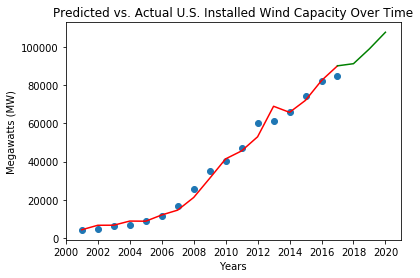

In [1071]:
#Including Texas

plt.scatter(np.arange(2001,2018), wind_data_formatted.groupby(by = 'year').sum()['mw_year_0']);
plt.plot(np.arange(2001,2018), wind_data_formatted.groupby(by = 'year').sum()['mw_0_pred'], 'r');
plt.plot([2017,2018,2019,2020],future_2.loc['2017'][-4:],'g')


plt.title('Predicted vs. Actual U.S. Installed Wind Capacity Over Time');
plt.ylabel('Megawatts (MW)');
plt.xlabel('Years');
plt.xticks(np.arange(2000,2021, step = 2));

In [1076]:
tx_errors = wind_data_formatted[wind_data_formatted['State'] == 'Texas']['mw_0_pred'] - wind_data_formatted[wind_data_formatted['State'] == 'Texas']['mw_year_0']

In [1079]:
np.mean(tx_errors**2)

1084770.735736489

In [1080]:
errors = wind_data_formatted['mw_0_pred'] - wind_data_formatted['mw_year_0']

In [1081]:
np.mean(errors**2)

44799.17874534203

In [1088]:
year_2017 = wind_data_formatted[wind_data_formatted['year'] =='2017']

In [1092]:
year_2017[year_2017['State'] =='Texas']['mw_year_0']

873    21450.0
Name: mw_year_0, dtype: float64

In [1096]:
print('Percent Texas:', year_2017[year_2017['State'] =='Texas']['mw_year_0'] / year_2017['mw_year_0'].sum())

Percent Texas: 873    0.252516
Name: mw_year_0, dtype: float64


In [1098]:
#Save final DataFrame with predicted values as pickle file

with open ('predicted_wind.pickle', 'wb') as to_write:
    pickle.dump(wind_data_formatted, to_write)